# using keras rnn

In [1]:
import numpy as np
import pandas as pd
from keras.layers import LSTM, Dense
from keras.models import Sequential 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
df=pd.read_csv('DATA_keras/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
df.columns

Index(['S4248SM144NCEN'], dtype='object')

In [5]:
df.columns=['Sales']

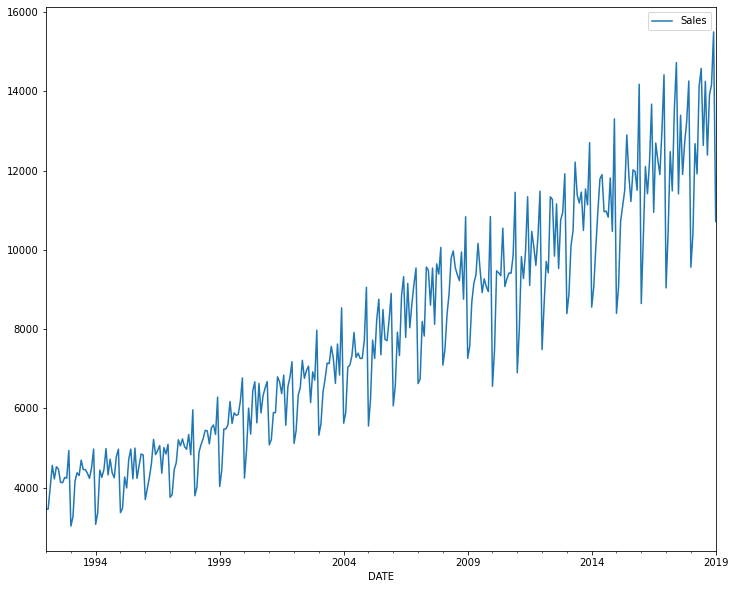

In [6]:
# next plot the dataframe 

df.plot(figsize=(12,10))

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
results =  seasonal_decompose(df['Sales'])

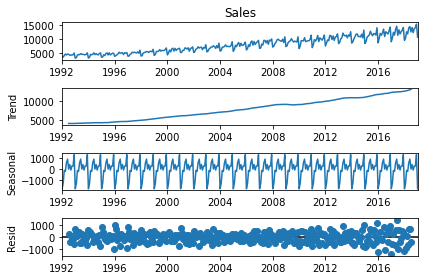

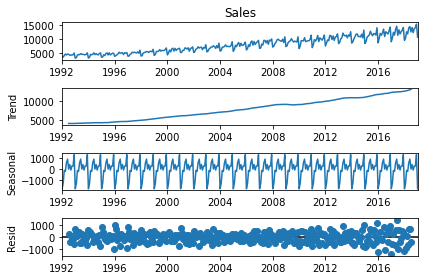

In [9]:
results.plot()

# just to check  the seasonal plot

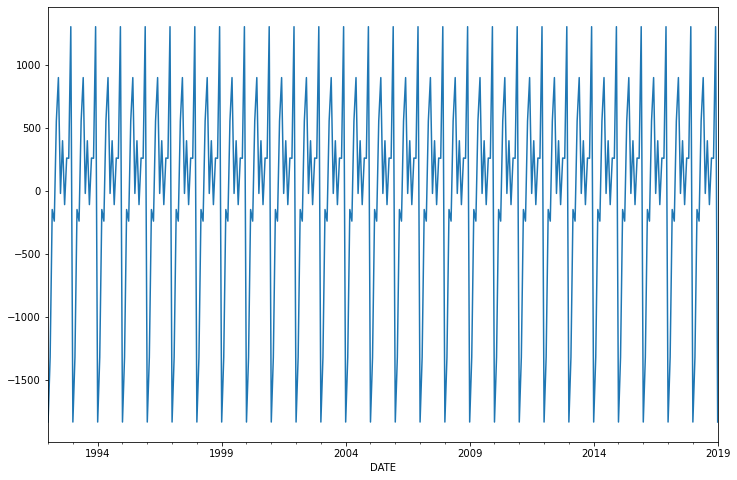

In [10]:
results.seasonal.plot(figsize=(12,8))

In [11]:
results.seasonal

DATE
1992-01-01   -1836.088354
1992-02-01   -1321.328738
1992-03-01    -148.299892
1992-04-01    -240.372008
1992-05-01     554.966133
                 ...     
2018-09-01    -109.224572
2018-10-01     260.730557
2018-11-01     258.666454
2018-12-01    1303.892416
2019-01-01   -1836.088354
Freq: MS, Name: seasonal, Length: 325, dtype: float64

In [12]:
len(df)

325

In [13]:
print(df.index.freq)

<MonthBegin>


# lets divide the training vs test data set 

In [14]:
# lets divide the training vs test data into 
325-12

313

In [15]:
train = df.iloc[:313]

In [16]:
test=df.iloc[313:]

In [17]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [18]:
len(test)

12

# scale the data 

## just putting forward an example 

In [19]:
se=np.array([23,56,2,13,14])

In [20]:
# now if we want to normalize this data 
se.max()#  this scaling fit 

56

In [21]:
se/se.max()## this is caled scaling transform

array([0.41071429, 1.        , 0.03571429, 0.23214286, 0.25      ])

# this is called scaling between 0 and 1 

In [22]:
from sklearn.preprocessing  import MinMaxScaler

In [23]:
scaler=MinMaxScaler()

In [24]:
scaler.fit(train)## find the max value in train data set 

MinMaxScaler()

In [25]:
scaled_train = scaler.transform(train)

In [26]:
scaled_test = scaler.transform(test)

In [27]:
##[t1,t2,t3]--> [t4]

In [28]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [29]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

# now recall  we have done the scaling (scaler_) on train data , hence if there is any max value in test dat like the 
# highest spike  as below in test data , that will have slighluy bigger value than 1  in scaled _test ata 

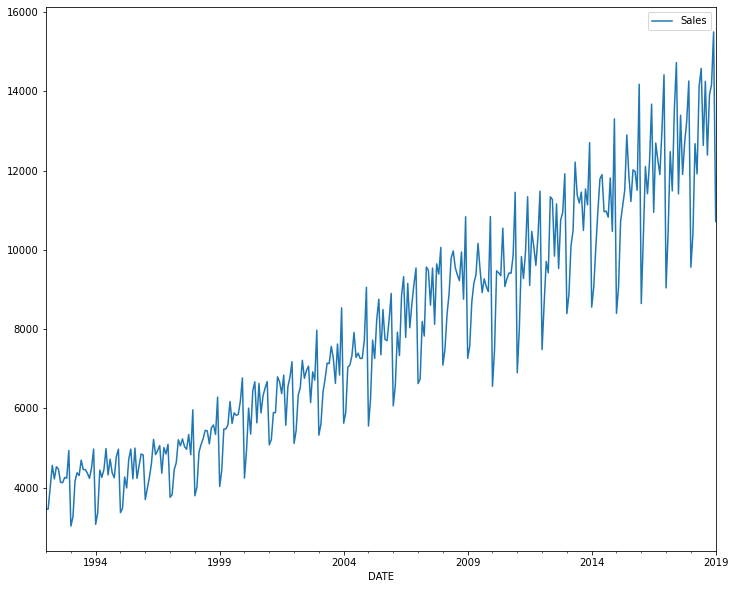

In [30]:
df.plot(figsize=(12,10))

# first lets do  timeseries generator split for a  small data set 

In [31]:
scaled_train [:5]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ]])

In [32]:
n_input =2
n_features=1 #  ( 1  time series)

generator =TimeseriesGenerator(scaled_train , scaled_train , length =n_input  , batch_size=1)

# batch_size =1 means 1  set of values of x , y 

In [33]:
len(scaled_train)

313

In [34]:
len(generator)

311

In [35]:
# hence length of scald_train - length of generator since number of input values =2 

In [36]:
generator[0]

(array([[[0.03658432],
         [0.03649885]]]),
 array([[0.08299855]]))

In [37]:
X , y = generator[0]

In [38]:
X

array([[[0.03658432],
        [0.03649885]]])

In [39]:
# the above 2  x values ook exact sa me as the forst 2 values of scaled_train[:5]

In [40]:
y

array([[0.08299855]])

In [41]:
X.shape

(1, 2, 1)

In [42]:
# the x , y values are 3 dimensional 

In [43]:
# batches of time series information into the neural etwork object 

In [44]:
# if batch sze is 2 , then we get the fllowing 

generator =TimeseriesGenerator(scaled_train , scaled_train , length =n_input  , batch_size=2)

In [45]:
len(scaled_train)

313

In [46]:
len(generator)

156

In [47]:
generator[0]

(array([[[0.03658432],
         [0.03649885]],
 
        [[0.03649885],
         [0.08299855]]]),
 array([[0.08299855],
        [0.13103684]]))

In [48]:
X, y = generator[0]

In [49]:
X.shape

(2, 2, 1)

In [50]:
y.shape

(2, 1)

# for neural nework for rnn , smaller batch size leads  to better training 

# end of experimentation 

In [60]:
n_input =12## (  4 years of  data )
n_features=1 #  ( 1  time series; predicting the 13th month)

train_generator =TimeseriesGenerator(scaled_train , scaled_train , length =n_input  , batch_size=1)

In [61]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM 


In [64]:
model = Sequential()
model.add(LSTM(150 ,activation='relu',input_shape=(n_input, n_features) ))
# here n_input: how many input sequences  we are sending to target the output , here 3 time steps ahead 
## n_features =1 , ( 1 singular time stamp )
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit_generator(train_generator , epochs =25)

Epoch 1/25
301/301 [==============================] - 8s 27ms/step - loss: 0.0183
Epoch 2/25
301/301 [==============================] - 4s 14ms/step - loss: 0.0097
Epoch 3/25
301/301 [==============================] - 4s 14ms/step - loss: 0.0083
Epoch 4/25
301/301 [==============================] - 4s 14ms/step - loss: 0.0082
Epoch 5/25
301/301 [==============================] - 4s 14ms/step - loss: 0.0074
Epoch 6/25
301/301 [==============================] - 4s 14ms/step - loss: 0.0053
Epoch 7/25
301/301 [==============================] - 4s 13ms/step - loss: 0.0041
Epoch 8/25
301/301 [==============================] - 4s 15ms/step - loss: 0.0036
Epoch 9/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0028
Epoch 10/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0027
Epoch 11/25
301/301 [==============================] - 5s 15ms/step - loss: 0.0022: 0s - loss
Epoch 12/25
301/301 [==============================] - 5s 17ms/step - loss: 0.0021:
E

In [ ]:
## find out the loss 

In [67]:
losses=pd.DataFrame(model.history.history)

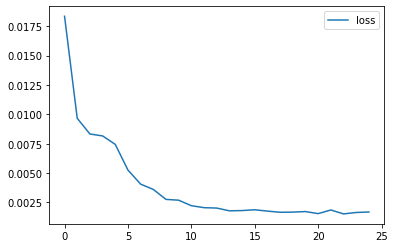

In [68]:
losses.plot()

# somewhere around 17 rounds , there is a convergence of loss 

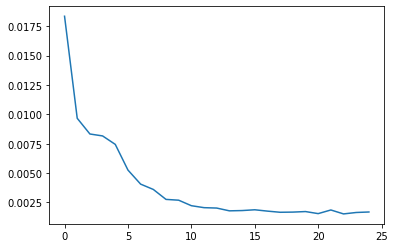

In [70]:
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

In [71]:
# # 12 history steps  --preidt step 13 

In [72]:
# last 12  points train  ---> pt  1 of test data

In [73]:
first_eval_batch = scaled_train[-12:]# we find out the last 12 points of the training set 

In [76]:
first_eval_batch=first_eval_batch.reshape(1,n_input,n_features)

In [78]:
first_eval_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [77]:
model.predict(first_eval_batch)

array([[0.730957]], dtype=float32)

In [79]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

# this means , given the 12 points , gives the test adat set that is the 13th point which is 0.730957

# forecast  using rnn model we just trained

In [84]:
test_predictions=[]# this will go on holding my predictions  as we go along 

## last n_input  points  from the  training set 
first_eval_batch =scaled_train[-n_input:]
##reshape this to the format  RNN wants  same format  as time seris generayor 
## time series geneartir  expected  values in batch_dimensions , n_input dimensions , n_features 
##reshaping  this to format the  rnn  wants  ( same format  as timeseries generator)
current_batch =first_eval_batch.reshape((1, n_input, n_features))

##  how far into the future  wil i forecast ?
## len(test)
## if  we want 
for i in range(len(test)):
    ## 1 timesetpe ahead of historical 12 points 
    current_pred =model.predict(current_batch)[0]
    ##store the prediction 
    test_predictions.append(current_pred)
    ## update the current batch  to include prediction
    current_batch =np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [85]:
test_predictions

[array([0.730957], dtype=float32),
 array([0.8622003], dtype=float32),
 array([0.8120729], dtype=float32),
 array([0.97471124], dtype=float32),
 array([1.0463305], dtype=float32),
 array([0.7977465], dtype=float32),
 array([0.9458404], dtype=float32),
 array([0.8193137], dtype=float32),
 array([0.89448816], dtype=float32),
 array([0.94044197], dtype=float32),
 array([1.0086373], dtype=float32),
 array([0.64289814], dtype=float32)]

# invert the scaling process

In [86]:
true_test_predictions=scaler.inverse_transform(test_predictions)

In [87]:
true_test_predictions

array([[11582.46561128],
       [13117.88154095],
       [12531.44054258],
       [14434.14678901],
       [15272.01995754],
       [12363.8360638 ],
       [14096.38705415],
       [12616.15103441],
       [13495.61693519],
       [14033.2305609 ],
       [14831.04787886],
       [10552.26536721]])

In [88]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [89]:
test['Predictions']=true_test_predictions

C:\Anacon\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11582.465611
2018-03-01,12683,13117.881541
2018-04-01,11919,12531.440543
2018-05-01,14138,14434.146789
2018-06-01,14583,15272.019958
2018-07-01,12640,12363.836064
2018-08-01,14257,14096.387054
2018-09-01,12396,12616.151034
2018-10-01,13914,13495.616935


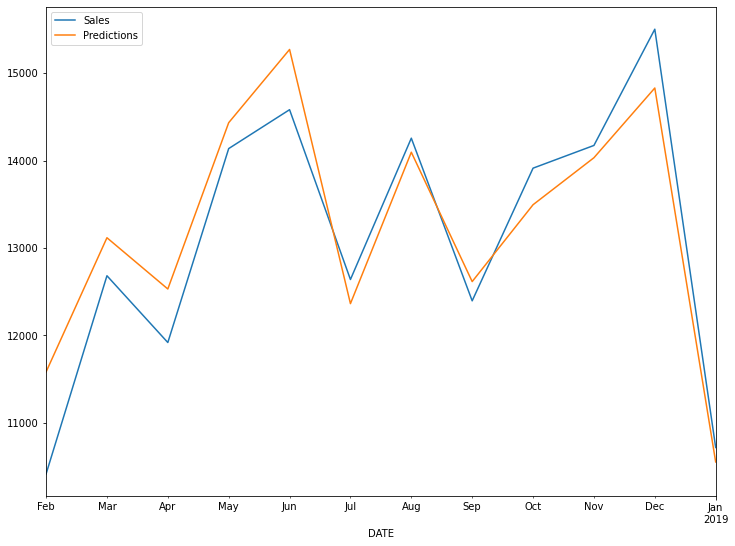

In [92]:
test.plot(figsize=(12,9))

In [93]:
model.save('mycoolmodel.h5')

In [94]:
pwd

'C:\\Users\\Asmita Chatterjee'

# if we want to load this model into  another notebook

In [97]:
from keras.models import load_model

In [98]:
new_model = load_model('mycoolmodel.h5')

In [99]:
new_model

In [100]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
